In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


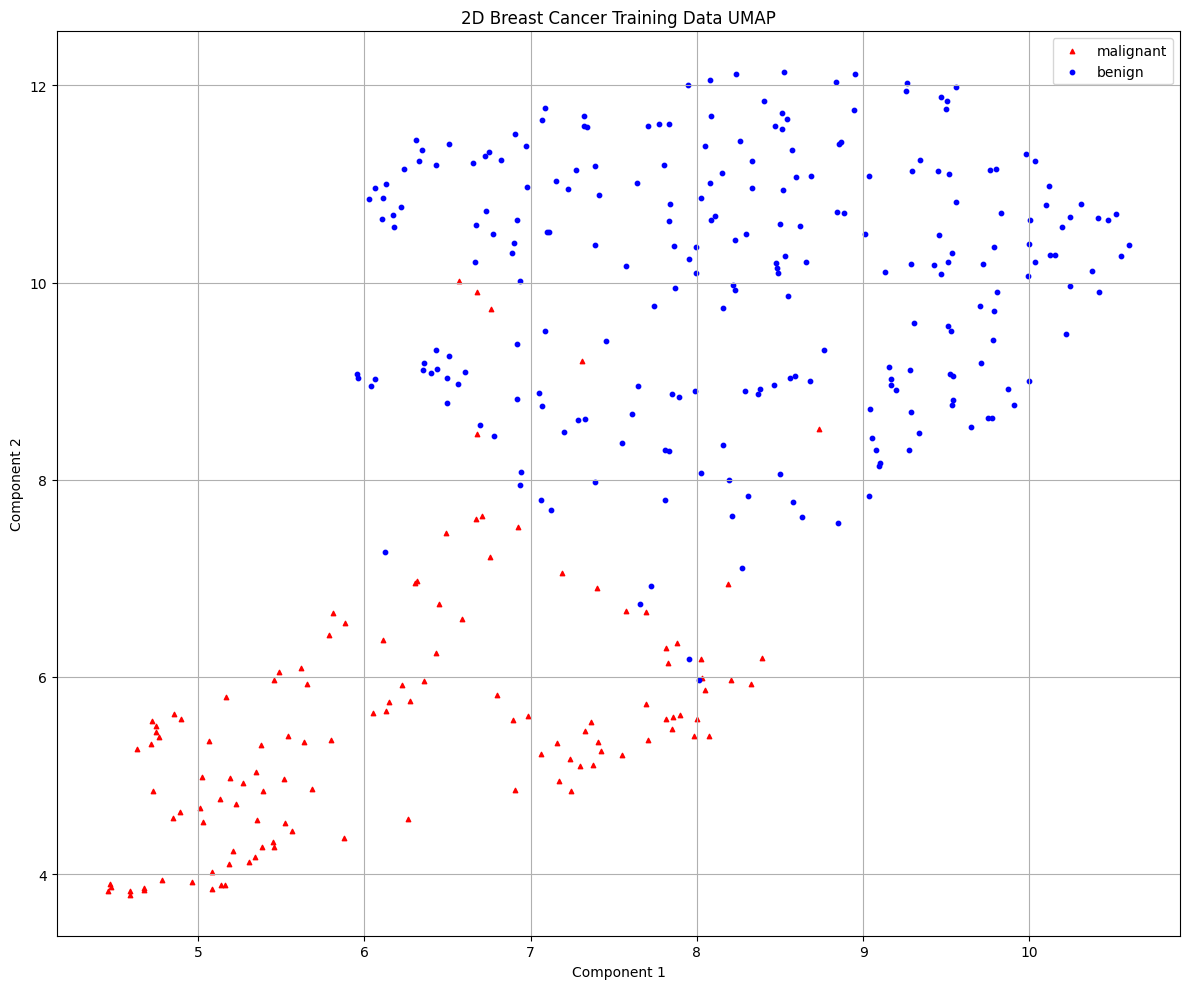

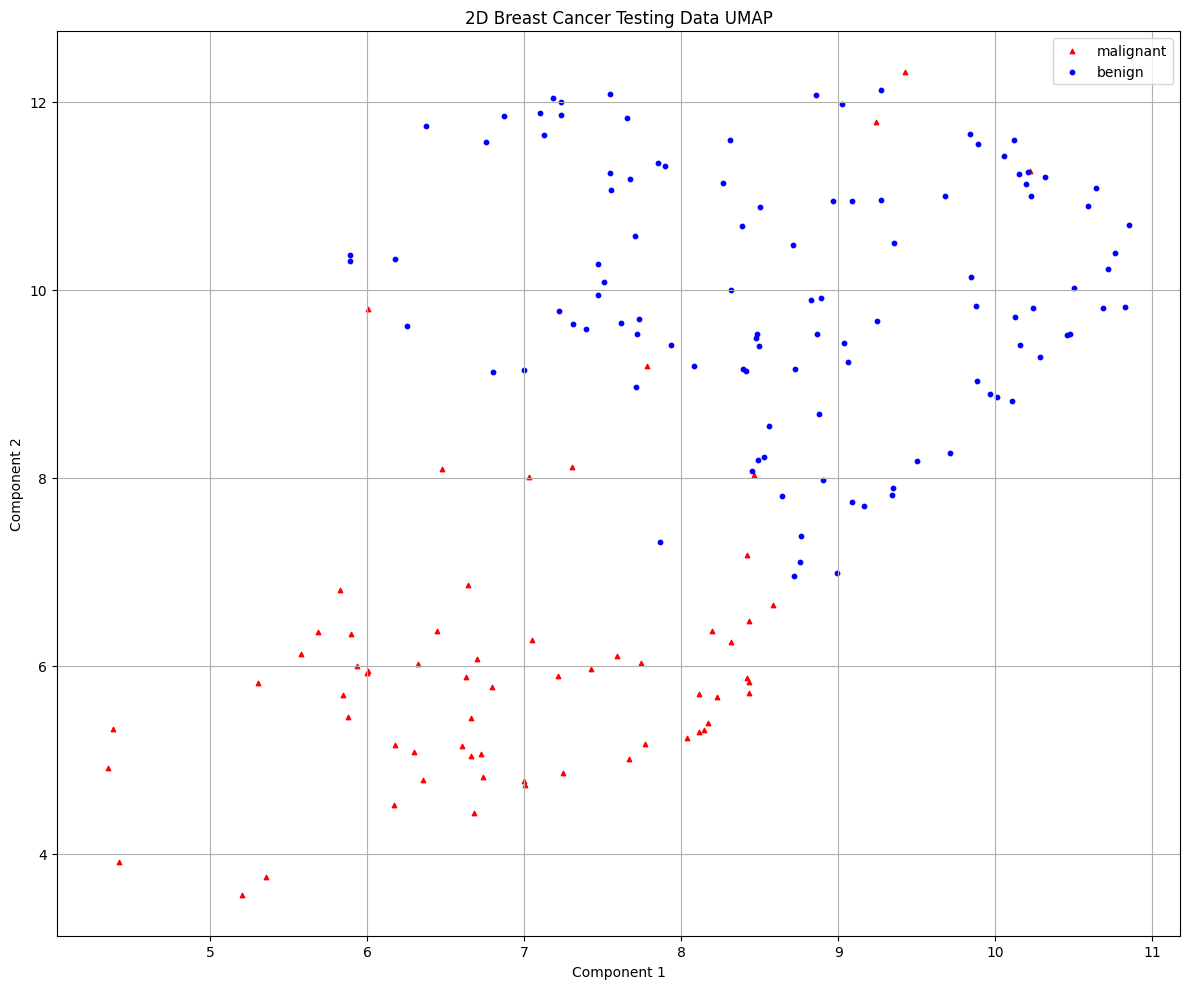

[I 2025-04-27 16:47:00,715] A new study created in memory with name: no-name-d2df3919-64c6-44dc-a225-883622631048
[I 2025-04-27 16:47:34,184] Trial 0 finished with value: 0.9640030441400305 and parameters: {'n_estimators': 6673, 'max_depth': 12, 'learning_rate': 0.1759741100603427, 'subsample': 0.9944313203647406, 'colsample_bytree': 0.8654317913665396, 'gamma': 1.434288176243893, 'reg_alpha': 1.5823044126060948e-06, 'reg_lambda': 5.980454720844602e-05}. Best is trial 0 with value: 0.9640030441400305.
[I 2025-04-27 16:48:11,140] Trial 1 finished with value: 0.958599695585997 and parameters: {'n_estimators': 4419, 'max_depth': 3, 'learning_rate': 0.0010197907565891902, 'subsample': 0.6665600866474756, 'colsample_bytree': 0.547047416505769, 'gamma': 4.4848907301823155, 'reg_alpha': 0.03611615808777617, 'reg_lambda': 0.07459233677420507}. Best is trial 0 with value: 0.9640030441400305.
[I 2025-04-27 16:48:55,985] Trial 2 finished with value: 0.9641552511415525 and parameters: {'n_estimato

Best trial:
Accuracy: 0.9669710806697107
Best hyperparameters:  {'n_estimators': 4569, 'max_depth': 14, 'learning_rate': 0.021902789607374063, 'subsample': 0.5407457518558023, 'colsample_bytree': 0.5131901638573914, 'gamma': 2.9449853386291918, 'reg_alpha': 0.017538331407314738, 'reg_lambda': 0.9867210085721217}


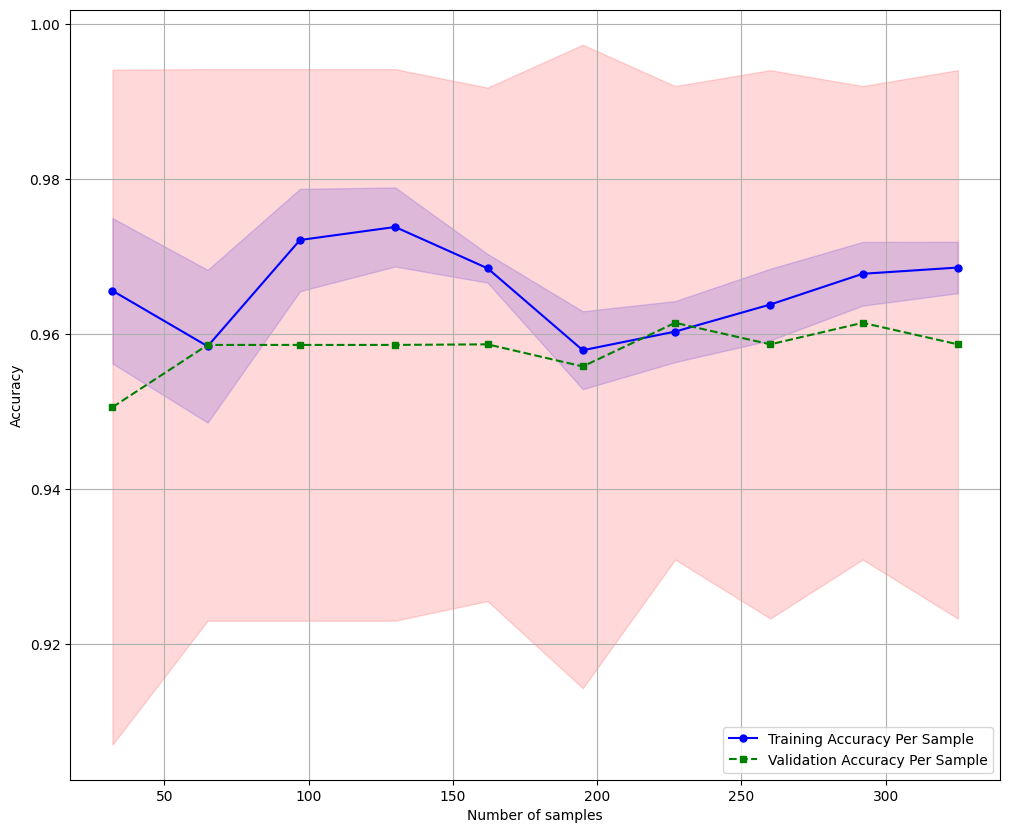

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9452


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)